# Практическая работа №3: Статистический анализ социальных сетей.
Выполнил студент гр. 0381 Соколов Дмитрий. Вариант №19

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада** $-$ элемент сети, представляющий собой пару акторов и связь между ними, либо её отсутствие,
        
$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.
        
**Цензус диад** — тройка чисел <M, A, N>, где:
        
$M = \sum_{i<j} X_{ij} X_{ji}$
        
$A = X_{++} - 2M$

$N = (^2_g) - A - M$

**Индекс взаимности Каца-Пауэлла** — хар-ка измерения тенденции акторов в группе:

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.

Вероятность взаимного выбора между любой произвольной парой акторов равна

 $d^2/(g-1)^2$

Вероятность того, что общая диада является взаимной:

$p(i → j ∩ j → i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$

Оценка при свободном выборе 

$p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$

Оценка при фиксированном выборе 

$p_{ekp}^\prime = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$

**Индекс взаимности Бандиопадхьяйя** — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}.$

$M_{\min} = \max f(t)$, $0\leqslant t \leqslant g$

$M_{\max} = \lfloor\frac{1}{2}(\sum_{i=1}^gx_{i+}-\max_{0 \leqslant t \leqslant g}g(t))\rfloor$
, где 

$f(t)=\sum_{i=1}^tx_{i+}-t(g-1)-(^t_2)$

$g(t)=\sum_{i=1}^tx_{i+}-t(t-1)-\sum_{i=t+1}^g\min(t,x_{i+})$

**Нулевые гипотезы**
 Для равномерного распределения

$H_0: L \sim B(g(g-1), \frac{1}{2})$

Статистика

$z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$ 

Для распределени Бернулли

$H_0 : L \sim B(g(g-1), P_0)$

Статистика

$z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$

**Доверительный интервал**

Оценка $P$

$P_{est} = \frac{\sum_{i=1}^g\sum_{j=1}^gx_{ij}}{g(g-1)}=\frac{l}{g(g-1)}$

Доверительный интервал:

$P_{lower} \leqslant P \leqslant P_{upper}$

$P_{lower} = P_{est} - Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

$P_{upper} = P_{est} + Z_{\frac{α}{2}}\sqrt{P_{est}(1-P_{est})/g(g-1)} $

Где $Z_{\frac{\alpha}{2}}: Ф(Z_{\frac{\alpha}{2}} = 0.5 - \frac{\alpha}{2})$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Каждый пункт работы (*по возможности*) выполняется с помощью кода.
Рекомендованные языки программирования – R или Python.

### 0) Установка необходимых библиотек и констант

* igraph

In [2]:
install.packages("igraph")
library(igraph)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




* network

In [14]:
install.packages("network")
library(network)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* sna

In [19]:
install.packages("sna")
library(sna)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: statnet.common


Attaching package: ‘statnet.common’


The following objects are masked from ‘package:base’:

    attr, order


sna: Tools for Social Network Analysis
Version 2.7 created on 2022-05-09.
copyright (c) 2005, Carter T. Butts, University of California-Irvine
 For citation information, type citation("sna").
 Type help(package="sna") to get started.



Attaching package: ‘sna’


The following objects are masked from ‘package:igraph’:

    betweenness, bonpow, closeness, components, degree, dyad.census,
    evcent, hierarchy, is.connected, neighborhood, triad.census




#### 0.5) Константы

In [15]:
g <- 80
p <- 0.63
P_0 <- 0.78
alpha <- 0.01

### 1) смоделировать случайный орграф $G_d$ на основе модели Эрдеша—Реньи. В R для модели случайного графа Эрдеша—Реньи существует функция erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите её.

> Модель Эрдеша—Реньи - модель генерации случайных графов. В данной модели граф строится путём случайного добавления рёбер. Каждое ребро включается в граф с вероятностью $p$ независимо от остальных рёбер. Соответственно, вероятность генерации каждого графа с $n$ вершинами и $M$ ребрами:
$p^M (1 - p)^{\binom{n}{2}-M} $, 
Параметр $p$ в этой модели можно рассматривать как функцию веса. По мере роста $$ от 0 к 1 модель включает с большей вероятностью графы с бо́льшим числом рёбер.

In [ ]:
graph <- sample_gnp(80, 0.63, directed = TRUE)
net <- network(as_adjacency_matrix(graph), directed = TRUE)

### 2) Отобразить полученный орграф.

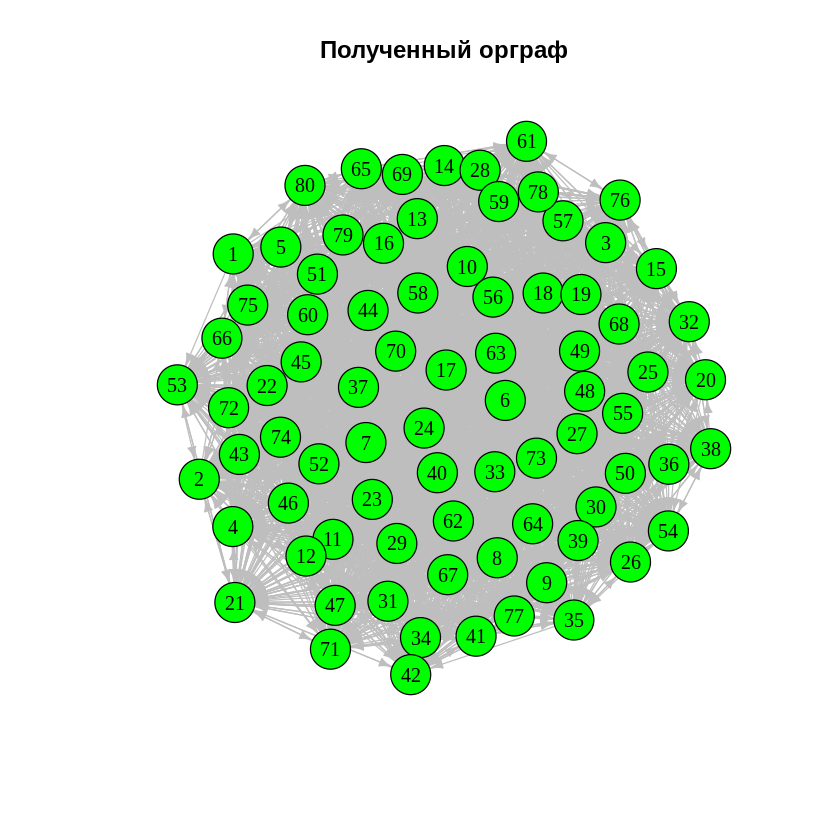

In [17]:
plot(graph, layout = layout.fruchterman.reingold, main = "Полученный орграф",
vertex.size = 15, edge.arrow.size=.5, 
edge.arrow.color = "black", edge.color = "grey",
vertex.color= "green",vertex.label.color = "black", 
)

### 3) Вычислить «пятичисловую сводку» для графа

In [22]:
data.frame(size=gorder(graph),
           density=network.density(net),
           components=components(net),
           diameter=diameter(graph),
           clasterisation_coefficient=gtrans(net, mode = "graph"))

size,density,components,diameter,clasterisation_coefficient
<int>,<dbl>,<int>,<dbl>,<dbl>
80,0.628481,1,2,0.6269465


### 4) Вычислить цензус диад. Сделать выводы.

In [34]:
census <- as.data.frame(t(dyad.census(net)))
census

,V1
,<dbl>
Mut,1240
Asym,1492
Null,428


**Вывод:** Числовые характеристики цензуса диад отображают тенденцию акторов к взаимным связям. Акторы в сети склонны взаимодействовать между собой, т.к. взаимных и асимметричных диад намного больше нуль-диад.

### 5) Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

> Фиксированный выбор $d$

In [50]:


# Katz Powell index fixed
KPif <- function(graph) {
  g <- gorder(graph)
  d <- 70
  M <- dyad_census(graph)$mut
  
  return ((2 * M * (g - 1) - g * d^2) / (g * d * (g - d - 1)))
}


> Свободный

In [53]:
adjacency <- function(graph) {
  return (as.matrix(igraph::as_adjacency_matrix(graph)))
}

# KatzPowellindex free
KPifree <- function(graph) {
  g <- gorder(graph)
  M <- dyad_census(graph)$mut

  L <- gsize(graph)
  L_2 <- sum(rowSums(adjacency(graph)) ^ 2)

  return ((2*(g - 1)^2 * M - L^2 + L_2)/(L*(g - 1)^2 - L^2 + L_2)) 
}


In [54]:
data.frame(fixed=KPif(graph), free=KPifree(graph))

fixed,free
<dbl>,<dbl>
-3.890476,-0.01092768


**Вывод:** при фиксированном выборе акторы более склонны образовывать взаимные связи. А при свободном выборе акторы склонны образовывать односторонние связи или не образовывать их вообще.

### 6) Вычислить вероятность того, что связь будет взаимной для каждого случая.

> Вероятность взаимной связи при фиксированном выборе

In [57]:
p_fixed <- function(graph) {
  g <- gorder(graph)
  d <- 70

  return (d / (g-1)) * ((d / (g - 1)) + KPif(graph) * (g - d - 1) / (g - 1))
}

> Вероятность взаимной связи при свободном выборе

In [59]:
p_free <- function(graph) {
  g <- gorder(graph)
  adj_mat <- adjacency(graph)

  return (
    sum(
      ( rowSums(adj_mat) * colSums(adj_mat)) / (g - 1)^2
    ) / g
  )
}

In [60]:
data.frame(p_fix=p_fixed(graph), p_free=p_free(graph))

p_fix,p_free
<dbl>,<dbl>
0.8860759,0.3949527


### 7) Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [61]:
reciprocity(graph)

[1] 0.6243706

**Выводы:** Можем заметить что индекс взаимности Бандиопадхьяйя примерно равен значению $p$

### 8) Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе $G_𝑑$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔 − 1), \frac{1}{2})$ при уровне значимости $α$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

> <center> $H_0 : n = g(g-1)$
> <center> $H_0 : n \neq g(g-1)$

In [67]:
z_score <- function(graph, p=0.5, alpha) {
  g <- gorder(graph)
  l <- sum(adjacency(graph))
  binom.test(l, g*(g-1), p, conf.level = 1 - alpha)
}

z_score(graph, alpha=alpha)




	Exact binomial test

data:  l and g * (g - 1)
number of successes = 3972, number of trials = 6320, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
99 percent confidence interval:
 0.6126527 0.6441147
sample estimates:
probability of success 
              0.628481 


> Видим, что p-value много меньше . Значит, нулевая гипотеза не выполняется, и вероятность "успеха" (построения ребра между любыми двумя акторами)  не равна 0.5. p-value является максимальным уровнем значимости, при котором гипотеза не отвергается. В данном случае этот уровень значимости очень мал

### 9) роверить нулевую гипотезу о том, что число дуг $𝐿$ в орграфе $G_𝑑$ имеет биномиальное распределение $𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃_0)$ при уровне значимости $α$. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

In [69]:
z_score(graph, p=P_0, alpha=alpha)




	Exact binomial test

data:  l and g * (g - 1)
number of successes = 3972, number of trials = 6320, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.78
99 percent confidence interval:
 0.6126527 0.6441147
sample estimates:
probability of success 
              0.628481 


Видим, что p-value много меньше . Значит, нулевая гипотеза не выполняется, и вероятность "успеха" (построения ребра между любыми двумя акторами) не равна 0.78.

### 10) Построить доверительный интервал для оценки параметра $𝑝$ с доверительной надёжностью $(1 − α)$. Сделать выводы.

In [72]:
g <- gorder(graph)
z_alpha_two <- 0.009776006
cap <- sum(adjacency(graph)) / (g * (g - 1))

lower <- cap - z_alpha_two * sqrt(cap * (1 - cap)/(g * (g - 1)))
upper <- cap + z_alpha_two * sqrt(cap * (1 - cap)/(g * (g - 1)))

data.frame(lower_border=lower, upper_border=upper)

lower_border,upper_border
<dbl>,<dbl>
0.6284216,0.6285404


**Вывод:** С вероятностью 99% интервал значение параметра $p$ попадает в интервал $(0.6284216, \  0.6285404)$

## Выводы

В ходе данной практической работы был проведен статистический анализ случайно смоделированного ориентированного графа с использованием библиотек igraph, network, sna. Анализ включает расчет пятичисловой сводки, вычисление цензуса диад, оценка индекса взаимности Каца—Пауэла, вычисление индекса взаимности Бандиопадхьяйя, проверку гипотезы о биномиальном распределении числе дуг и построение доверительный интервал. Проверена корректность посчитанных значений - большинство из них примерно равно входному значению $p$.